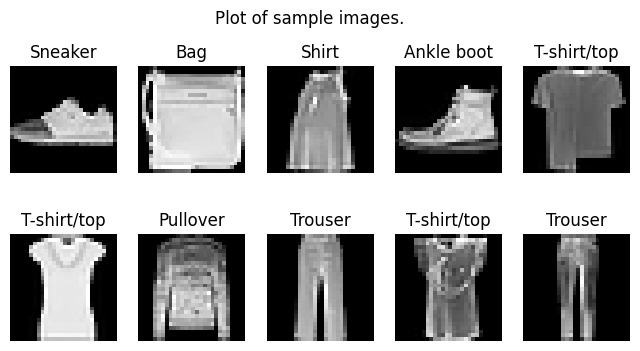

Shape of concatenated array: (58000, 784)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 13)                273       
                                                                 
 dense_2 (Dense)             (None, 9)                 126       
                                                                 
 dense_3 (Dense)             (None, 10)                100       
              

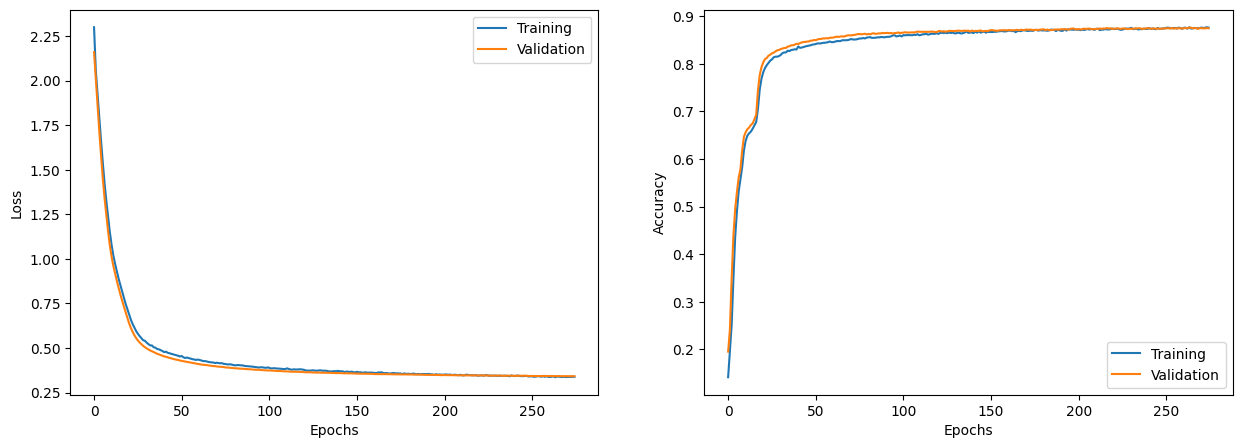

313/313 [==============================] - 0s 967us/step


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as skm

# Load Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# Normalize and reshape the predictors
train_x = train_x / 255
test_x = test_x / 255
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

# Create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# Define the labels dictionary
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

def plot_sample():
    indexes = np.random.randint(0, len(train_x), size=10)
    fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(8, 4))
    axes = axes.flatten()

    for i, index in enumerate(indexes):
        axes[i].imshow(train_x[index].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"{labels[train_y[index]]}")
        axes[i].axis("off")
    fig.suptitle("Plot of sample images.")
    plt.show()

# Call the plot_sample function
plot_sample()

# Concatenate train_x and test_x
train_data = np.concatenate((train_x, test_x))

# Check the shape of the concatenated array
print("Shape of concatenated array:", train_data.shape)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(train_x.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model
opt = tf.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x=train_x,
    y=train_y,
    epochs=275,
    batch_size=700,
    validation_data=(val_x, val_y)
)

# Plot training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluate the model on test set
Y_pred_prob = model.predict(test_x)
Y_pred = np.argmax(Y_pred_prob, axis=1)
cmat = skm.confusion_matrix(test_y, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmat, annot=True, cmap='Blues', fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Test Data')
plt.show()

# Calculate metrics
accuracy = np.sum(np.diag(cmat)) * 100 / np.sum(cmat)
sensitivity = cmat[1, 1] / (cmat[0, 1] + cmat[1, 1]) * 100
specificity = cmat[0, 0] / (cmat[1, 0] + cmat[0, 0]) * 100

print('Accuracy:', accuracy, "%")
print('Sensitivity:', sensitivity, "%")
print('Specificity:', specificity, "%")